**TITANIC**

In [52]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from collections import Counter 
import warnings
warnings.filterwarnings('ignore')


In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [55]:
df=pd.concat([train, test])

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
print(df.columns.values) # printa apenas as colunas

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [58]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0              1       0.0       3  ...    7.2500   NaN         S
1              2       1.0       1  ...   71.2833   C85         C
2              3       1.0       3  ...    7.9250   NaN         S
3              4       1.0       1  ...   53.1000  C123         S
4              5       0.0       3  ...    8.0500   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305       NaN       3  ...    8.0500   NaN         S
414         1306       NaN       1  ...  108.9000  C105         C
415         1307       NaN       3  ...    7.2500   NaN         S
416         1308       NaN       3  ...    8.0500   NaN         S
417         1309       NaN       3  ...   22.3583   NaN         C

[1309 rows x 12 columns]>

In [59]:
df.describe() # exibe a statistica 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**Média de sobrevivencia**
Quanto mais próximo de 1 melhor

obs: >0.5

In [60]:
#Pessoas da 1 classe obtiveram uma maior média de sobrevivencia
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [61]:
# Mulheres sobrevivem mais que homens
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean() 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [62]:
#Total de pessoas por sexo
count_Sex = df['Sex'].value_counts()

In [16]:
count_Sex

male      843
female    466
Name: Sex, dtype: int64

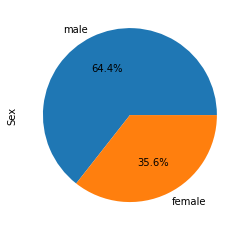

In [63]:
#Porcentagem de pessoas por sexo
count_Sex.plot(kind = 'pie', autopct='%1.1f%%') #autopct prevê que o gráfico possa mostrar percentil.

In [64]:
#Quantidade de sobreviventes e mortos
count_Survived = df['Survived'].value_counts()

In [65]:
count_Survived

0.0    549
1.0    342
Name: Survived, dtype: int64

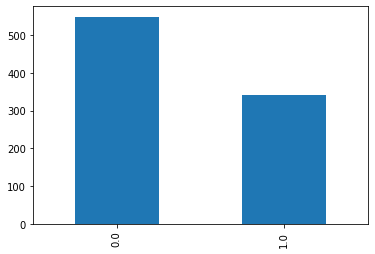

In [66]:
count_Survived.plot(kind='bar')

**Quantidade e Media de sobreviventes por idade e sexo**

In [67]:
#Apenas quantidade de sobreviventes
Survived=count_Survived.loc[1]
Survived

342

In [69]:
#Cerca de 233 pessoas sobreviventes do sexo feminino tinha idade média em torno de 28 e 29 anos
#Cerca de 109 pessoas sobreviventes do sexo masculino tinha idade média em torno de 27
df.groupby(['Sex','Survived']).agg({'Age': np.mean, 'PassengerId': np.size})

Age  PassengerId
Sex    Survived                        
female 0.0       25.046875           81
       1.0       28.847716          233
male   0.0       31.618056          468
       1.0       27.276022          109

```
Sabemos que sobreviveram mais mulheres do que homens ao naufrageo 
e atraves da amostra abaixo podemos observar uma pequena diferença na classe social dessas mulheres . `
```

In [70]:
df.groupby(['Sex','Survived','Pclass']).agg({'Age': np.mean, 'PassengerId': np.size})

Age  PassengerId
Sex    Survived Pclass                        
female 0.0      1       25.666667            3
                2       36.000000            6
                3       23.818182           72
       1.0      1       34.939024           91
                2       28.080882           70
                3       19.329787           72
male   0.0      1       44.581967           77
                2       33.369048           91
                3       27.255814          300
       1.0      1       36.248000           45
                2       16.022000           17
                3       22.274211           47

```
Por Idade
```

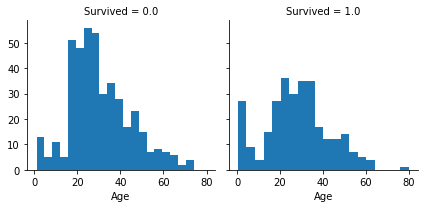

In [71]:
grafico = sns.FacetGrid(df, col='Survived') # cria grafico para cada valor possível
grafico.map(plt.hist, 'Age', bins=20)

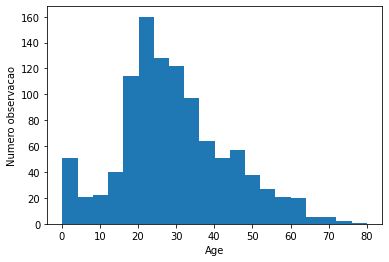

In [53]:
fig, ax = plt.subplots()
ax.hist(df.Age, bins=20)
ax.set_xlabel('Age')
ax.set_ylabel('Numero observacao')
plt.show()

````
Gráfico mostra que no portão Q entrou mas pessoas da 3 classe

Gráfico mostra que maior parte das pessoas da 2 classe entraram pelo portãp S

Gráfico mostra que o portão S recebeu maior parte dos embarques independente da classe.
````

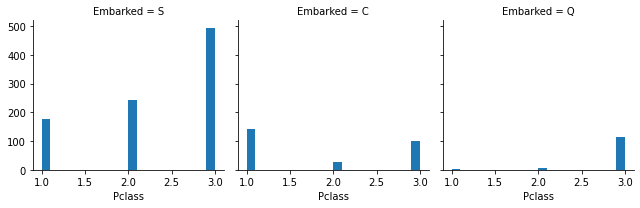

In [59]:
g = sns.FacetGrid(df, col="Embarked") # We see as many graphs as the value of the "Embarked" argument.
g.map(plt.hist, "Pclass", bins = 20)
plt.show()

Probabilidade de sobrevivencia por classe

```
mesmo tendo mais passageiros,  a terceira classe teve menos chances de sobreviver
```

In [88]:
df['Pclass'].value_counts() # Total de ocorrencia das classes

3    709
1    323
2    277
Name: Pclass, dtype: int64

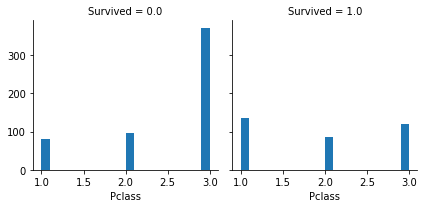

In [75]:
g = sns.FacetGrid(df, col="Survived") # We see as many graphs as the value of the "Embarked" argument.
g.map(plt.hist, "Pclass", bins = 20)
plt.show()

Podemos observar que A primeira classe teve mais chances de sobrevivencia em comparação com a 3 classe

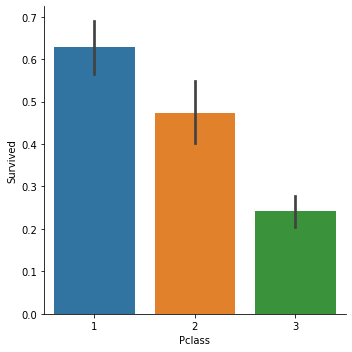

In [82]:
sns.catplot(x = 'Pclass', y = 'Survived', data=df, kind = 'bar')

o Parch(pais ou crianças a bordo) não influencia na chance de sobrevivencia

In [116]:
df[['Survived', 'Parch']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


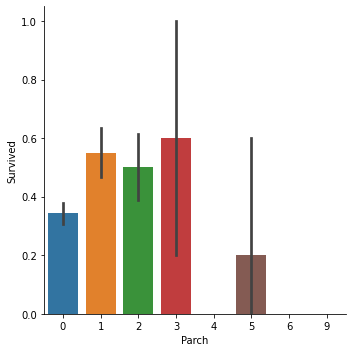

In [59]:
sns.catplot(x = 'Parch', y = 'Survived', data= df, kind = 'bar')

Gráficos de Correlação:
Útil para visualizar se existem correlações positivas ou negativas entre colunas 

Quanto mais próximo de zero positivo mais correlação existe


Interpretando o valor de ρ

    0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [25]:
correlacoes = df.corr()

In [90]:
correlacoes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


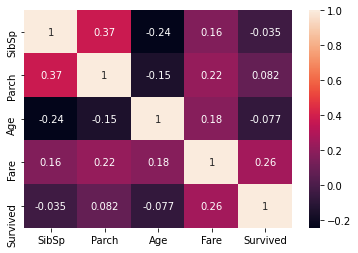

In [72]:
lista = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[lista].corr(), annot = True)
plt.show()

O mapa de correlação mostra que não há nenhuma relação forte entre as variáveis



```
Chance de sobrevivencia por fare

Mesmo existindo uma correlação fraca entre Tarifa de passageiro vamos verificar a chance por essa variável.

Podemos analisar que quanto maior a tarifa  maior a chance de sobrevivencia

e que Os passageiros que adquiriram as tarifas de maior valor foram os da 1 classe

```

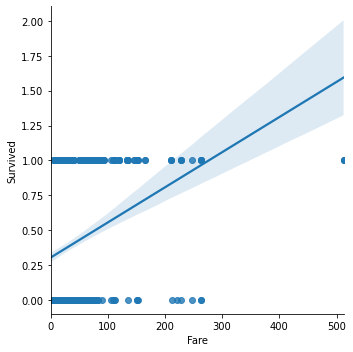

In [51]:
sns.lmplot(x='Fare', y='Survived', data=df ) # Quanto maior o valor do fare maior a chance de sobreviver

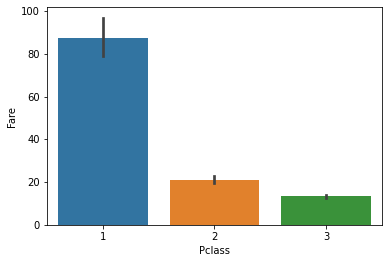

In [26]:
sns.barplot(x='Pclass', y='Fare', data=df,)